In [57]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [58]:
np.random.seed(0)

In [59]:
def display_sample(sample):
    plt.figure(figsize=(2, 2))
    plt.imshow(sample, cmap='gray')
    plt.show()

In [60]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [61]:
# 80% for train and 20% for validation

# TODO: Split your (X_train, y_train) data into 2 parts: 80% is used for training (X_tr, y_tr) and 20% is used for validation (X_val, y_val).
# Splitting your training data into training and validation is one of the best practices to handle underfitting and overfitting issues.
# In general, you use the train data for training and the validation data for checking whether your model is overfitting or underfitting

from sklearn.model_selection import train_test_split


X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Train X data shape: %s" % (X_tr.shape,))
print("Train y data shape: %s" % (y_tr.shape,))
print("Validation X data shape: %s" % (X_val.shape,))
print("Validation y data shape: %s" % (y_val.shape,))
print("Test X data shape: %s" % (X_test.shape,))
print("Test y data shape: %s" % (y_test.shape,))

Train X data shape: (48000, 28, 28, 1)
Train y data shape: (48000,)
Validation X data shape: (12000, 28, 28, 1)
Validation y data shape: (12000,)
Test X data shape: (10000, 28, 28, 1)
Test y data shape: (10000,)


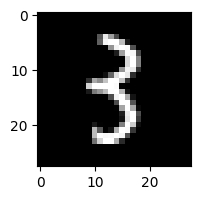

Label: 3


In [62]:
display_sample(X_tr[0])
print("Label: %s" % y_tr[0])

In [63]:
def normalize(X):
    return X / 255

In [64]:
X_tr_norm = normalize(X_tr)
X_val_norm = normalize(X_val)
X_test_norm = normalize(X_test)

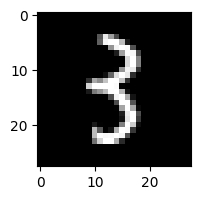

Label: 3


In [65]:
display_sample(X_tr_norm[0])
print("Label: %s" % y_tr[0])

In [66]:
# TODO: Build your own CNN model
# Cant run Because of resourceExhaustionError


model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X_tr_norm.shape[1], X_tr_norm.shape[2], 1)),
    
    tf.keras.layers.MaxPooling2D((2, 2)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(10, activation='softmax')
])

In [67]:
# You can adjust hyperparameters to the ones you need

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [68]:
history = model.fit(X_tr_norm, y_tr, validation_data=(X_val_norm, y_val), batch_size=100, epochs=50)

Epoch 1/50


2023-12-11 20:59:59.583783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - ETA: 0s - loss: 0.8884 - accuracy: 0.6821

2023-12-11 21:00:10.468246: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


480/480 [==============================] - 12s 24ms/step - loss: 0.8884 - accuracy: 0.6821 - val_loss: 0.2137 - val_accuracy: 0.9312
Epoch 2/50
480/480 [==============================] - 11s 23ms/step - loss: 0.1915 - accuracy: 0.9451 - val_loss: 0.0919 - val_accuracy: 0.9731
Epoch 3/50
480/480 [==============================] - 11s 22ms/step - loss: 0.1104 - accuracy: 0.9682 - val_loss: 0.0639 - val_accuracy: 0.9822
Epoch 4/50
480/480 [==============================] - 11s 22ms/step - loss: 0.0840 - accuracy: 0.9758 - val_loss: 0.0462 - val_accuracy: 0.9868
Epoch 5/50
480/480 [==============================] - 11s 22ms/step - loss: 0.0710 - accuracy: 0.9801 - val_loss: 0.0400 - val_accuracy: 0.9886
Epoch 6/50
480/480 [==============================] - 10s 21ms/step - loss: 0.0621 - accuracy: 0.9831 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 7/50
480/480 [==============================] - 10s 22ms/step - loss: 0.0529 - accuracy: 0.9850 - val_loss: 0.0407 - val_accuracy: 0.9897
Epo

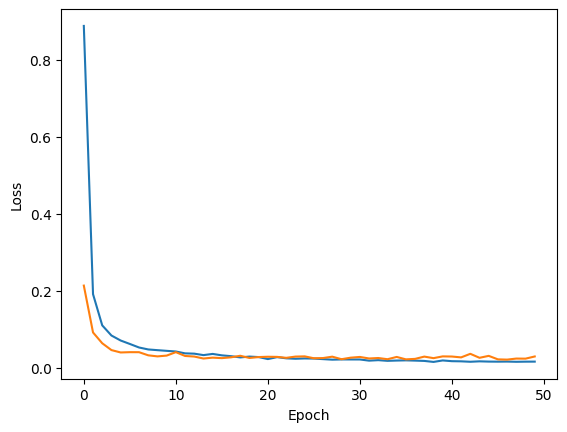

In [69]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

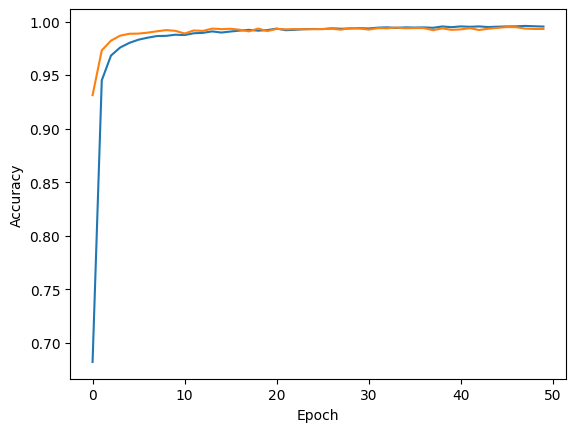

In [70]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [72]:
accuracy_metric = tf.keras.metrics.Accuracy()
predictions = model.predict(X_val_norm).argmax(axis=1)

print("Accuracy (validation): %s" % accuracy_metric(predictions, y_val).numpy())

375/375 [==============================] - 2s 4ms/step
Accuracy (validation): 0.99308336


In [73]:
accuracy_metric = tf.keras.metrics.Accuracy()
predictions = model.predict(X_test_norm).argmax(axis=1)

print("Accuracy (Test): %s" % accuracy_metric(predictions, y_test).numpy())

 12/313 [>.............................] - ETA: 1s 

2023-12-11 21:09:02.712860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 4ms/step
Accuracy (Test): 0.9931
